# Tensorflow demo

In this demo we will get familiar tensorflow:keras: https://keras.io/


First we do all the imports

In [1]:
import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras import Sequential, losses, optimizers, utils
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, save_model
from matplotlib import pyplot as plt
import random

Next we will create a model.
- The input shape will 1x28x28 because the image is 28x28
    - Activation:
        - relu: Hidden layer ot use
        - softmax: Output layer by classification
- Conv2D: is a convolutional 2D layer that will be used as an input layer
- MaxPooling2D: is a pooling layer
- Dropout: will randomly set some weight to 0, this can be used to enhance precision
    - Percentage of weights that should be dropped
- Flatten: Will flatten our 2D shape into a 1D shape
- Dense: A filly connected layer
- Compile: The neural network will compile into a tensorflow graph
    - loss: the used loss function (most of the time: root mean squared error)
    - optimizer: The used optimizer (most of the time: sgd = Stochastic gradient descent 

In [2]:
def create_model():
    if K.image_data_format() == 'channels_first':
        input_shape = (1, 28, 28)  # (1, img_rows, img_cols)
    else:
        input_shape = (28, 28, 1)  # (img_rows, img_cols, 1)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer="sgd",
                  metrics=['accuracy'])
    return model

Preprocessing: We have to prepare the X & Y data

In [3]:
def prepare_X_data(x_unprepared_data, printing=True):
    if printing:
        print("unprepared X_shape:" + str(x_unprepared_data.shape))

    img_rows = x_unprepared_data.shape[1]
    img_cols = x_unprepared_data.shape[2]

    if K.image_data_format() == 'channels_first':
        x_data = x_unprepared_data.reshape(x_unprepared_data.shape[0], 1, img_rows, img_cols)
    else:
        x_data = x_unprepared_data.reshape(x_unprepared_data.shape[0], img_rows, img_cols, 1)

    x_data = x_data.astype('float32')
    x_data /= 255
    if printing:
        print('prepared X_data shape:', x_data.shape)
        print("")
    return x_data

def prepare_Y_data(y_unpreprared_data, printing=True):
    if printing:
        print("unprepared Y_shape:" + str(y_unpreprared_data.shape))
    y_data = utils.to_categorical(y_unpreprared_data, 10)
    if printing:
        print('prepared Y_data shape:', y_data.shape)
        print("")
    return y_data

Next we create a method to randomly select a test item. This test item will be predicted and matched against the ground truth

In [4]:
def random_predict(model):
    (_, _), (x_test, y_test) = mnist.load_data()
    index = random.randint(0, len(x_test) - 1)
    X = x_test[index]
    image = np.array(X, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    X = prepare_X_data(x_unprepared_data=np.array([X]),printing=False)
    prediction = model.predict(X)
    print("Prediction array: " + str(prediction))
    print("Prediction: " + str(np.argmax(prediction)))
    print("Ground truth: " + str(y_test[index]))
    print("")

We combine the above methods to train the model. 
Loading de MNIST-dataset and split this dataset into training and testing, this method will only use the training data.
After training we will save the model in order to not lose our training progression.

In [5]:
def train_model(model):
    (x_train, y_train), (_, _) = mnist.load_data()
    x_prep_train = prepare_X_data(x_unprepared_data=x_train)
    y_prep_train = prepare_Y_data(y_unpreprared_data=y_train)
    model.fit(x_prep_train, y_prep_train, batch_size=128, epochs=12, verbose=1)
    print("save model")
    print("")
    save_model(model=model, filepath="example_model.h5")

After training we have to evaluate our training model with the test set.

In [6]:
def eval_model(model):
    (_, _), (x_test, y_test) = mnist.load_data()
    x_prep_test = prepare_X_data(x_unprepared_data=x_test, printing=False)
    y_prep_test = prepare_Y_data(y_unpreprared_data=y_test, printing=False)
    score = model.evaluate(x_prep_test, y_prep_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print("")

No we can use all the methods to build, train and test the model. 
10 randomly selected items will be predicted to see the prediction output

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

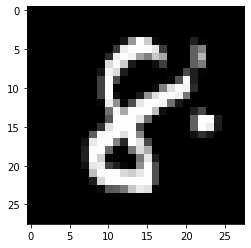

Prediction array: [[8.6214801e-04 1.2521667e-03 1.4281529e-02 5.6477159e-04 1.9891805e-04
  8.3673297e-04 8.8017462e-03 1.1060364e-04 9.7307181e-01 1.9590387e-05]]
Prediction: 8
Ground truth: 8



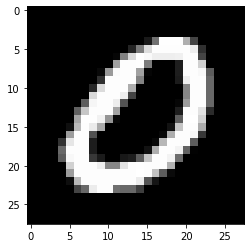

Prediction array: [[9.99996424e-01 1.07184315e-08 1.39571318e-06 2.91048230e-09
  3.21158709e-08 1.14596673e-06 7.52584754e-07 4.34340421e-08
  2.08435775e-08 2.16685493e-07]]
Prediction: 0
Ground truth: 0



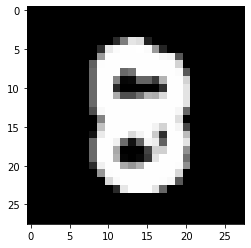

Prediction array: [[6.7147124e-03 2.8764296e-04 2.1408902e-02 1.4900530e-02 1.3949716e-04
  6.0474582e-04 3.6850266e-04 4.2014709e-04 9.4787139e-01 7.2838599e-03]]
Prediction: 8
Ground truth: 8



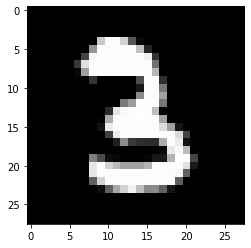

Prediction array: [[1.3612880e-07 9.3668259e-06 4.6884855e-03 9.9472153e-01 1.3855236e-09
  2.7506842e-04 4.0503545e-07 3.2688929e-06 3.0120168e-04 4.1655017e-07]]
Prediction: 3
Ground truth: 3



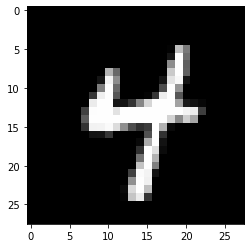

Prediction array: [[1.7485587e-10 1.0678607e-08 3.3428493e-09 6.0010885e-09 9.9984455e-01
  2.0170039e-06 1.0273675e-07 8.0854543e-06 4.1609061e-07 1.4480353e-04]]
Prediction: 4
Ground truth: 4



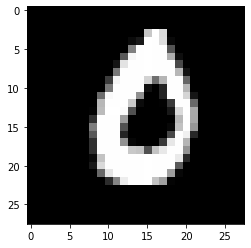

Prediction array: [[9.6174443e-01 3.5164870e-05 1.7527567e-03 7.2517178e-05 3.9180755e-05
  4.5571633e-04 3.5526205e-02 1.4960213e-05 1.2086248e-04 2.3807531e-04]]
Prediction: 0
Ground truth: 0



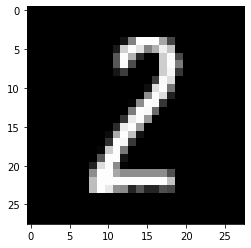

Prediction array: [[1.6436867e-04 3.0209707e-02 9.0998107e-01 1.5625421e-02 5.7706478e-07
  8.6778464e-06 6.6625139e-06 2.4886964e-05 4.3960627e-02 1.7959288e-05]]
Prediction: 2
Ground truth: 2



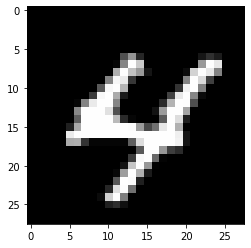

Prediction array: [[3.3743586e-08 1.8535348e-10 4.5932759e-07 2.7837382e-10 9.9978250e-01
  3.6741883e-06 1.6558100e-06 1.8754573e-06 1.2077106e-07 2.0966223e-04]]
Prediction: 4
Ground truth: 4



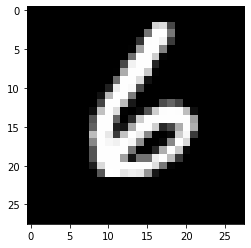

Prediction array: [[1.00830539e-06 1.10552264e-07 1.17476511e-05 2.41847555e-08
  5.03665888e-06 7.11300163e-06 9.99974251e-01 1.04710853e-08
  6.92184358e-07 3.96293274e-08]]
Prediction: 6
Ground truth: 6



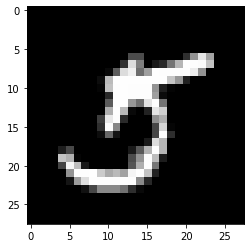

Prediction array: [[6.9703086e-04 4.4808708e-06 9.4083009e-07 6.0851331e-04 3.4376788e-07
  9.9857783e-01 2.8691877e-06 1.6499702e-05 7.1528520e-05 1.9866427e-05]]
Prediction: 5
Ground truth: 5



In [7]:
model = create_model()
model.summary()
# train_model(model=model)
model = load_model("example_model.h5")
eval_model(model)
for _ in range(10):
    random_predict(model)

A correct example:

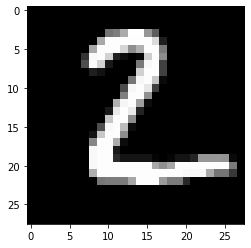

Prediction array: [[6.0280847e-05 3.1808595e-04 9.9914527e-01 4.1767690e-04 1.3485847e-09
  1.5691418e-05 2.4972935e-05 1.2815385e-08 1.7830731e-05 2.6881009e-09]]
Prediction: 2
Ground truth: 2


In [8]:
(_, _), (x_test, y_test) = mnist.load_data()
image = x_test[1]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
Y = prepare_X_data(x_unprepared_data=np.array([image]), printing=False)
prediction = model.predict(Y)
print("Prediction array: " + str(prediction))
print("Prediction: " + str(np.argmax(prediction)))
print("Ground truth: " + str(y_test[1]))

A incorrect example:

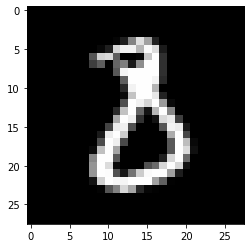


Prediction array: [[6.0280847e-05 3.1808595e-04 9.9914527e-01 4.1767690e-04 1.3485847e-09
  1.5691418e-05 2.4972935e-05 1.2815385e-08 1.7830731e-05 2.6881009e-09]]
Prediction: 2
Ground truth: 8


In [9]:
(_, _), (x_test, y_test) = mnist.load_data()
first_image = x_test[591]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
Y = prepare_X_data(x_unprepared_data=np.array([image]),printing=False)
prediction = model.predict(Y)
print()
print("Prediction array: " + str(prediction))
print("Prediction: " + str(np.argmax(prediction)))
print("Ground truth: " + str(y_test[591]))

In most cases the above functions will be enough. 
However if we have enormous data we cannot load into memory, we have to make use of a generator as show below.

A generator can return results when the result is needed. If the next result is queried, the generator will calculate the next result and return this next result. 
First we define a helper function to loop over a list indefinite (get_part_of_list)

In [10]:
def get_part_of_list(lst, start, items):
    end = len(lst)
    if start + items > end:
        missing = start + items - end
        result = lst[start:end]
        result = np.concatenate((result, lst[:missing]))
        return result, missing
    else:
        return lst[start:start + items], start + items


def train_generator(iterations=500):
    (x_train, y_train), (_, _) = mnist.load_data()  # Do not load all data in memory at once!
    iteration = 0
    start = 0
    batch_size = 128
    while True:
        if iterations == iteration:
            break
        x_unprep_subset, _ = get_part_of_list(lst=x_train, start=start, items=batch_size)
        y_unprep_subset, next_start = get_part_of_list(lst=y_train, start=start, items=batch_size)
        start = next_start
        x_prep_subset = prepare_X_data(x_unprepared_data=x_unprep_subset, printing=False)
        y_prep_subset = prepare_Y_data(y_unpreprared_data=y_unprep_subset, printing=False)
        yield x_prep_subset, y_prep_subset
        iteration += 1


def test_generator(iterations=100):
    (_, _), (x_test, y_test) = mnist.load_data()  # Do not load all data in memory at once!
    iteration = 0
    start = 0
    batch_size = 128
    while True:
        if iterations == iteration:
            break
        x_unprep_subset, _ = get_part_of_list(lst=x_test, start=start, items=batch_size)
        y_unprep_subset, next_start = get_part_of_list(lst=y_test, start=start, items=batch_size)
        start = next_start
        x_prep_subset = prepare_X_data(x_unprepared_data=x_unprep_subset,printing=False)
        y_prep_subset = prepare_Y_data(y_unpreprared_data=y_unprep_subset, printing=False)
        yield x_prep_subset, y_prep_subset
        iteration += 1
    

Next we will redefine our training & testing functions to use the generator:

In [11]:
def train_model_with_generator(model):
    train_gen = train_generator(iterations=500*12)
    model.fit(x=train_gen)
    print("save model")
    print("")
    save_model(model=model, filepath="example_model_generator.h5")


def eval_model_with_generator(model):
    test_gen = test_generator(iterations=100)
    score = model.evaluate(x=test_gen)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Finally we will combine the generator functions to train and test the model.

  ...
    to  
  ['...']
    100/Unknown - 5s 54ms/step - loss: 0.1110 - accuracy: 0.9680Test loss: 0.11096267261076719
Test accuracy: 0.96796876


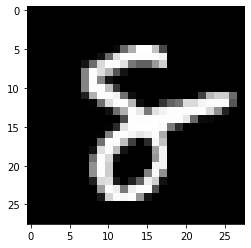

Prediction array: [[2.3858884e-06 6.5917149e-08 2.4027399e-06 2.2185418e-06 6.1994018e-07
  6.8785579e-05 4.6408468e-06 8.1277244e-07 9.9988091e-01 3.7222082e-05]]
Prediction: 8
Ground truth: 8



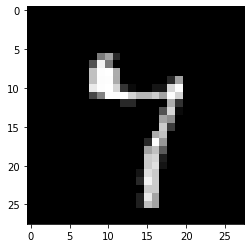

Prediction array: [[1.33630820e-05 1.47337205e-05 9.40054269e-06 1.96209476e-05
  2.44166725e-03 2.65512429e-03 2.19242629e-05 9.93922770e-01
  5.36425796e-04 3.64929729e-04]]
Prediction: 7
Ground truth: 7



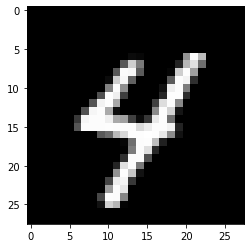

Prediction array: [[1.04027436e-08 8.77575879e-09 7.15145703e-08 1.54661706e-08
  9.98727381e-01 2.57518514e-06 5.41504050e-07 6.95690687e-06
  1.37337179e-06 1.26098690e-03]]
Prediction: 4
Ground truth: 4



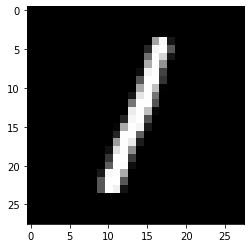

Prediction array: [[1.04515775e-05 9.99328852e-01 1.29268621e-04 9.51878428e-06
  5.23969948e-06 1.43637817e-05 8.42893423e-05 1.43225134e-05
  3.89345747e-04 1.42969666e-05]]
Prediction: 1
Ground truth: 1



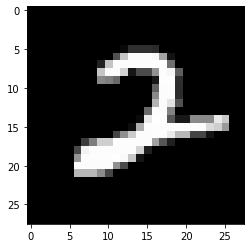

Prediction array: [[1.5637663e-06 1.0219692e-05 9.6375418e-01 1.9073689e-04 1.7340639e-08
  9.9277770e-07 1.4161295e-06 3.5965785e-02 7.4377611e-05 7.3909371e-07]]
Prediction: 2
Ground truth: 2



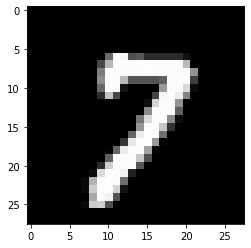

Prediction array: [[1.7825221e-07 3.0699387e-06 2.5096550e-04 3.2584503e-04 5.1856492e-08
  1.0022805e-07 2.4622859e-09 9.9906045e-01 5.7056379e-05 3.0225771e-04]]
Prediction: 7
Ground truth: 7



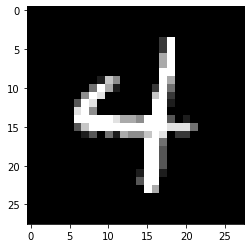

Prediction array: [[6.0174876e-10 5.1352855e-09 7.9819259e-08 1.1027844e-08 9.9997437e-01
  6.3119205e-07 7.4919214e-08 7.3784184e-07 1.3676292e-08 2.4031353e-05]]
Prediction: 4
Ground truth: 4



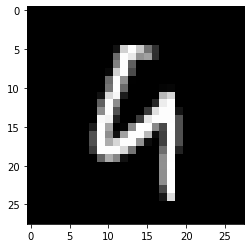

Prediction array: [[5.7662572e-05 1.7915262e-04 9.6506430e-03 8.5551455e-06 7.6798683e-01
  1.9700024e-03 1.4982417e-01 9.8396602e-05 1.5842636e-03 6.8640292e-02]]
Prediction: 4
Ground truth: 9



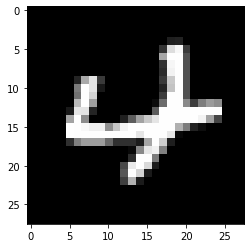

Prediction array: [[7.3090831e-07 5.9662135e-08 3.4326201e-04 1.8839490e-08 9.9923635e-01
  1.5517544e-06 7.2278788e-05 3.0826068e-05 8.8511717e-07 3.1409861e-04]]
Prediction: 4
Ground truth: 4



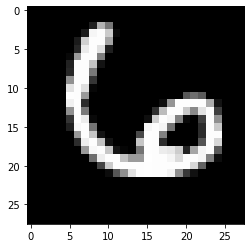

Prediction array: [[4.31369654e-06 4.23639858e-06 5.04540396e-04 2.08805403e-07
  2.63939182e-05 5.21336224e-05 9.99406576e-01 1.08239043e-07
  1.36202641e-06 1.16451254e-07]]
Prediction: 6
Ground truth: 6



In [12]:
model = create_model()
#train_model_with_generator(model=model)
model = load_model("example_model_generator.h5")
eval_model_with_generator(model)
for _ in range(10):
    random_predict(model)